# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Познакомимся с файлом

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из общей информации видим, что в данных много пропусков, и некоторые колонки нуждаются в замене типов.

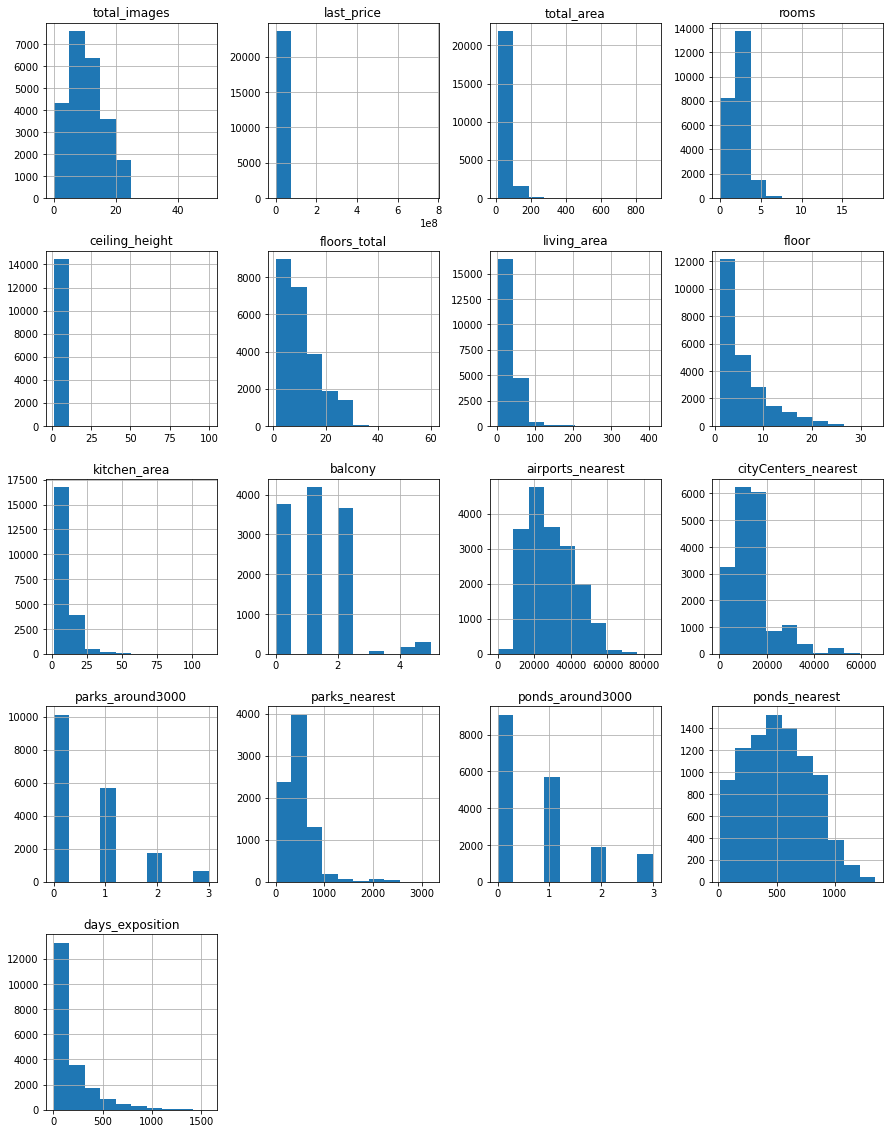

In [5]:
data.hist(figsize=(15, 20));

В колонках last_price, ceiling_height, total_area, living_area, kitchen_area присутствуют аномальные значения, с которыми стоит разобраться.

### Предобработка данных

#### Удаление пропусков

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В колонках is_apartment, balcony, parks_around3000 и ponds_around3000 скорее всего отсутствуют значения потому, что квартиры не являются аппартементами, балконов, парков и прудов поблизости нет. Поэтому пропуски в этих столбцах заменим на нули. Логично, что если парков и прудов рядом нет, то и колонки parks_nearest и ponds_nearest остаются пустыми.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data.query('cityCenters_nearest.isna() and locality_name != "Санкт-Петербург"')['cityCenters_nearest'].isna().count()

5458

Почти во всех случаях, когда в колонке cityCenters_nearest встречаются пропуски - это данные о квартирах в областных населенных пунктах, до какого центра считать расстояние не понятно, поэтому оставим как есть, но будем иметь в виду.

В колонке floors_total количество пропусков минимально, их можно удалить.

In [11]:
data = data.dropna(subset=['floors_total'])

В колонках ceiling_height, floors_total, living_area, kitchen_area, locality_name и airports_nearest могли возникнуть пропуски, потому что составитель объявления не указал эти данные, однако, пропуски в колонке days_exposition никак не могут быть связаны с человеческим фактором, поэтому, я делаю ставку на сбои в системе. Таким пропускам не получается найти логичную замену, поэтому оставим их как есть.

#### Изменение типов данных

In [12]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**- first_day_exposition переведем в тип datetime**  
чтобы работать с этим столбцом как с датами

**- is_apartment переведем в bool**  
здесь либо аппартаменты, либо нет

**- floors_total и balcony переведем в int**  
количество этажей и балконов - это целочисленные величины

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].replace({1: True, 0: False})
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)

In [14]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Удаление дубликатов

In [15]:
data.duplicated().sum()

0

Явных дубликатов нет, будем искать неявные

In [16]:
sorted(data['locality_name'].dropna().unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

"Поселок" и "посёлок" или "городской посе(ё)лок" и "посе(ё)лок городского типа" или "поселок при железнодорожной станции" и "поселок станции" - это неявные дубликаты, приведем их к одному виду.

In [17]:
data['locality_name'].replace({'посёлок' : 'поселок',
                               'городской пос[её]лок' : 'поселок городского типа',
                               'пос[её]лок при железнодорожной станции' : 'поселок станции'}, regex=True, inplace=True)

In [ ]:
data.locality_name.nunique()

321

In [ ]:
data.locality_name.unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

В списке уникальных значений можно увидеть такие похожие названия как, например, "Кудрово" и "деревня Кудрово". Деревня стала городом в 2018 году, поэтому в данных присутствуют оба варианта. Смена статуса могла повлиять на рыночную стоимость, а, значит, это важно для исследования. Поэтому оставляю типы населенных пунктов

#### Устранение аномалий

В колонке last_price удалим по полпроцента выдающихся данных с обеих сторон. Для нашего исследования это редкие выбивающиеся из общей картины уникальные объекты, по которым необходимо проводить отдельную работу

<AxesSubplot:>

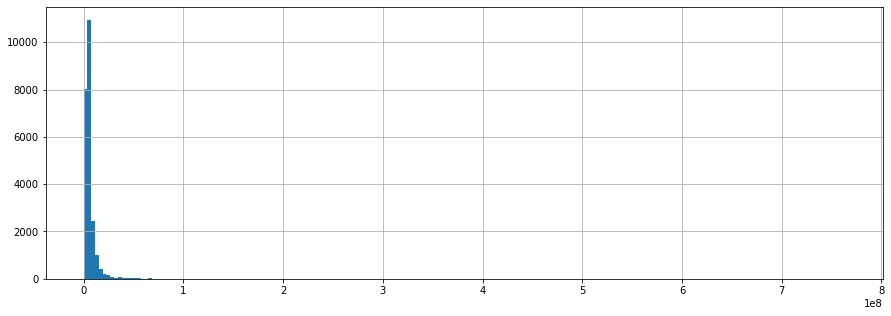

In [31]:
data['last_price'].hist(bins=200, figsize=(15, 5))

In [32]:
data['last_price'].quantile([.005, .25, .5, .75, .995])

0.005    8.000000e+05
0.250    3.400000e+06
0.500    4.650000e+06
0.750    6.799000e+06
0.995    5.494000e+07
Name: last_price, dtype: float64

In [33]:
data = data.query('800000 <= last_price <= 53929000')

<AxesSubplot:>

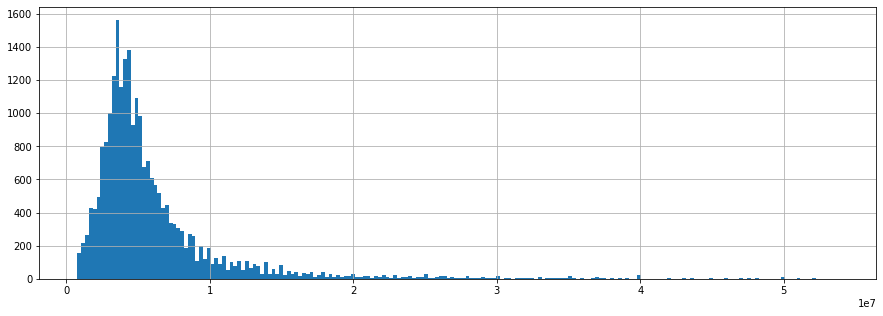

In [34]:
data['last_price'].hist(bins=200, figsize=(15, 5))

Так гистограмма стала намного нагляднее

Подобным образом рассмотрим и остальные параметры

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,376.00","23,376.00","14,366.00","20,246.00","23,376.00","21,542.00","21,185.00","23,376.00","23,376.00"
min,0.00,12.00,1.00,1.00,"800,000.00",2.00,1.30,1.00,1.00
max,19.00,517.00,100.00,"1,580.00","53,800,000.00",332.00,100.70,33.00,60.00
median,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00


Остались аномалии и редкости в колонках: rooms, total_area, ceiling_height, days_exposition, living_area, kitchen_area, floors_total

In [47]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'living_area', 'kitchen_area', 'floors_total']]
    .quantile([0.025, 0.25, .5, .75, .975]) #по полпроцента с каждой стороны - получатся оптимальные 5%
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,living_area,kitchen_area,floors_total
0.025,1.00,29.80,2.50,6.00,14.60,5.20,3.00
0.25,1.00,40.00,2.52,45.00,18.62,7.00,5.00
0.5,2.00,52.00,2.65,95.00,30.00,9.10,9.00
0.75,3.00,69.00,2.80,229.00,42.10,12.00,16.00
0.975,4.00,134.70,3.46,834.97,80.20,24.00,25.00


In [48]:
data.query(        #
    
    '(rooms <= 4 or rooms.isna()) and \
     29.4 <= total_area <= 141 and \
     (2.5 <= ceiling_height <= 3.5 or ceiling_height.isna()) and \
     (6 <= days_exposition <= 845 or days_exposition.isna()) and \
     (15 <= living_area <= 83.57 or living_area.isna()) and \
     (5.2 <= kitchen_area <= 23 or kitchen_area.isna()) and \
     3 <= floors_total <= 25'
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.9,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.0,2017-07-07,1,NaN,5,17.5,4,False,False,False,6.0,0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413.0
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.0,2018-01-15,3,NaN,5,38.0,4,False,False,False,8.5,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0


При предобработке потеряно 4,8% данных, результат, близкий к оптимальному

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,896.00","22,896.00","14,034.00","19,842.00","22,896.00","21,093.00","20,770.00","22,896.00","22,896.00"
min,0.00,20.00,2.50,3.00,"800,000.00",10.90,5.00,1.00,2.00
max,7.00,301.90,4.40,"1,373.00","53,800,000.00",180.00,46.00,27.00,28.00


### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу колонку с ценой одного квадратного метра.

In [50]:
try:
    data['sq_m_price'] = round(data['last_price'] / data['total_area'])
except:
    pass

Добавим в таблицу колонку с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [51]:
data['weekday'] = data['first_day_exposition'].dt.day_of_week

Добавим в таблицу колонку с месяцем публикации объявления.

In [52]:
data['month'] = data['first_day_exposition'].dt.month

Добавим в таблицу колонку с годом публикации объявления.

In [53]:
data['year'] = data['first_day_exposition'].dt.year

Добавим в таблицу колонку с типом этажа квартиры (значения — «первый», «последний», «другой»).

In [54]:
def floor_type(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

data['floor_type'] = data.apply(floor_type, axis=1)

Добавим в таблицу колонку с расстоянием до центра города в километрах (переведем из м в км и округлим до целых значений).

In [55]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

Посмотрим, что получилось.

In [56]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,other,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,other,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,other,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок городского типа Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95066.0,0,9,2018,other,NaN
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110545.0,3,4,2019,other,12.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,87455.0,2,5,2018,other,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88525.0,6,2,2017,other,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.0,3,11,2017,other,14.0
11,9,3300000.0,44.00,2018-08-27,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.0,0,8,2018,other,52.0


### Проведите исследовательский анализ данных

#### Изучите параметры объектов

##### Общая площадь

Text(0.5, 1.0, 'Total area')

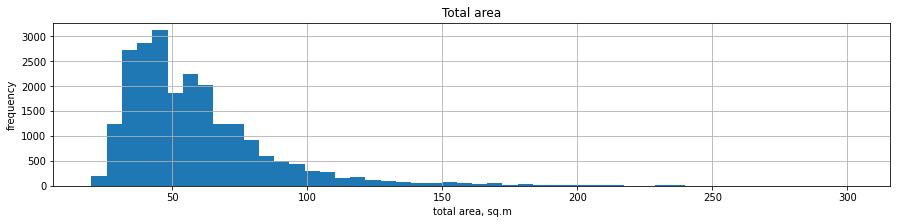

In [57]:
ax = data['total_area'].hist(bins=50, figsize=(15, 3))
ax.set_xlabel('total area, sq.m')
ax.set_ylabel('frequency')
ax.set_title('Total area')

In [58]:
data['total_area'].describe()

count    22896.000000
mean        58.806419
std         28.123876
min         20.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        301.900000
Name: total_area, dtype: float64

В выборке представлены квартиры общей площадью от 20 до 301 квадратных метров. Средний показатель выборки - 59 кв. м. Медианный показатель - 52 кв. м. Основная часть квартир имеют общую площадь от 40 до 69 кв. м.

##### Жилая площадь

Text(0.5, 1.0, 'Living area')

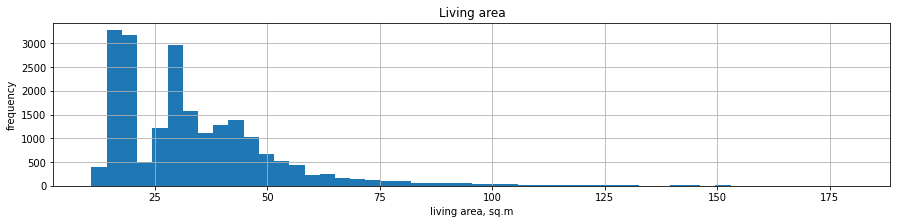

In [59]:
ax = data['living_area'].hist(bins=50, figsize=(15, 3))
ax.set_xlabel('living area, sq.m')
ax.set_ylabel('frequency')
ax.set_title('Living area')

In [60]:
data['living_area'].describe()

count    21093.000000
mean        33.680000
std         18.364801
min         10.900000
25%         18.620000
50%         30.000000
75%         42.100000
max        180.000000
Name: living_area, dtype: float64

В выборке представлены квартиры с жилой площадью от 11 до 180 квадратных метров. Средний показатель выборки - 34 кв. м. Медианный показатель - 30 кв. м. Основная часть квартир имеют жилую площадь от 19 до 42 кв. м.

##### Площадь кухни

Text(0.5, 1.0, 'Kitchen area')

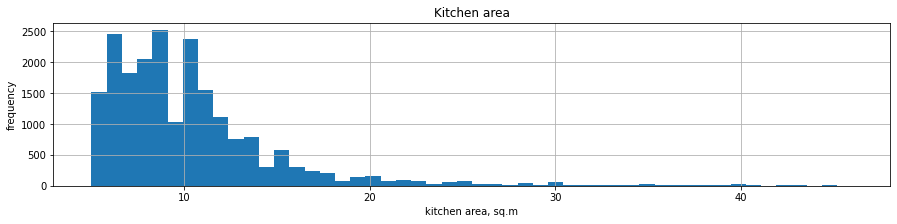

In [61]:
ax = data['kitchen_area'].hist(bins=50, figsize=(15, 3))
ax.set_xlabel('kitchen area, sq.m')
ax.set_ylabel('frequency')
ax.set_title('Kitchen area')

In [62]:
data['kitchen_area'].describe()

count    20770.000000
mean        10.344982
std          4.946060
min          5.000000
25%          7.000000
50%          9.100000
75%         12.000000
max         46.000000
Name: kitchen_area, dtype: float64

В выборке представлены квартиры с площадью кухни от 5 до 46 квадратных метров. Средний показатель выборки - 10 кв. м. Медианный показатель - 9 кв. м. Основная часть квартир имеют площадь кухни от 7 до 12 кв. м.

##### Цена объекта

Text(0.5, 1.0, 'Last price')

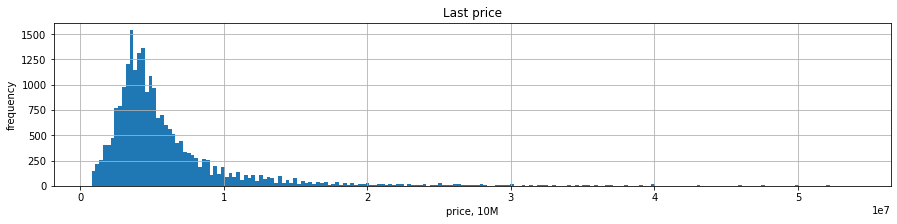

In [63]:
ax = data['last_price'].hist(bins=200, figsize=(15, 3))
ax.set_xlabel('price, 10M')
ax.set_ylabel('frequency')
ax.set_title('Last price')

In [64]:
data['last_price'].describe()

count    2.289600e+04
mean     5.970191e+06
std      4.811039e+06
min      8.000000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      5.380000e+07
Name: last_price, dtype: float64

В выборке представлены квартиры стоимостью от 800 тысяч до 54 млн. Средний показатель выборки - 6 млн. Медианный показатель - 4,7 млн. Основная часть квартир имеют стоимость от 3,5 до 6,7 млн.

##### Количество комнат

Text(0.5, 1.0, 'Number of rooms')

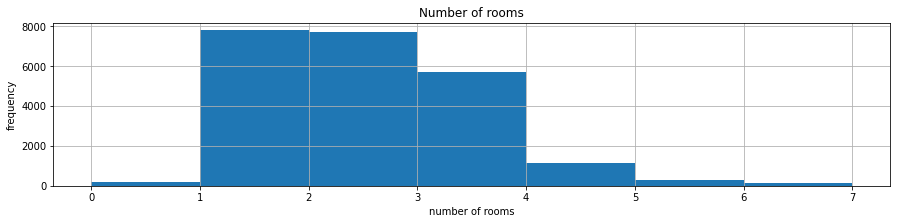

In [65]:
ax = data['rooms'].hist(bins=7, figsize=(15, 3))
ax.set_xlabel('number of rooms')
ax.set_ylabel('frequency')
ax.set_title('Number of rooms')

In [66]:
data['rooms'].describe()

count    22896.000000
mean         2.050751
std          1.011207
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

В выборке представлены квартиры с количеством комнат от 0 до 7. Средний показатель выборки - 2 комнаты. Медианный показатель - 2 комнаты. Основная часть квартир имеют от 1 до 3 комнат.

##### Высота потолков

Text(0.5, 1.0, 'Ceiling height')

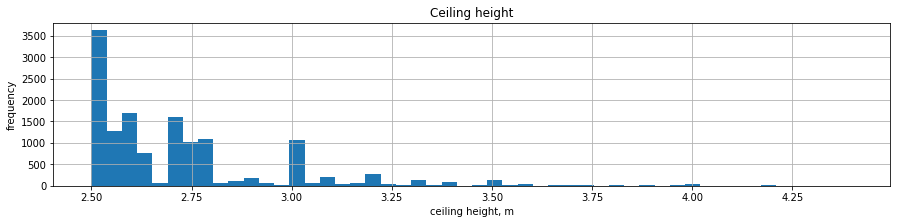

In [67]:
ax = data['ceiling_height'].hist(bins=50, figsize=(15, 3))
ax.set_xlabel('ceiling height, m')
ax.set_ylabel('frequency')
ax.set_title('Ceiling height')

In [68]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,cityCenters_nearest_km
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.50,2,False,True,False,NaN,2,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0,90741.0,3,3,2017,other,NaN
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.00,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0,92800.0,2,9,2017,first,NaN
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,91479.0,0,3,2018,other,15.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.30,19,False,False,True,NaN,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98110.0,1,3,2017,other,19.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0,74000.0,2,2,2019,other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,123077.0,4,9,2017,other,13.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.00,4,False,False,True,NaN,2,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,4.0,90253.0,3,9,2017,other,NaN
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,128846.0,4,9,2018,other,17.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.00,8,False,False,True,NaN,2,Никольское,NaN,NaN,0.0,NaN,0.0,NaN,82.0,50000.0,5,11,2017,other,NaN


In [69]:
data['ceiling_height'].describe()

count    14034.000000
mean         2.720338
std          0.257694
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.400000
Name: ceiling_height, dtype: float64

В выборке представлены квартиры с высотой потолков от 2,5 м до 4,4 м. Средний показатель выборки - 2,7 м. Медианный показатель - 2,7 млн. Основная часть квартир имеют высоту потолков от 2,5 до 2,8 м.

##### Этаж квартиры

Text(0.5, 1.0, 'Floor')

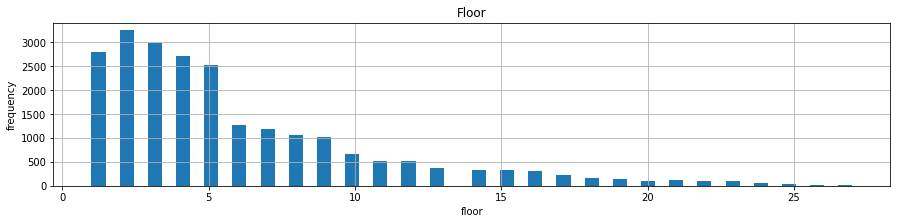

In [ ]:
ax = data['floor'].hist(bins=54, figsize=(15, 3))
ax.set_xlabel('floor')
ax.set_ylabel('frequency')
ax.set_title('Floor')

Провал появляется после 5 этажей, и затем после 9. Это логично, учитывая что типовая застройка 5-ти и 9-тиэтажная

In [72]:
data['floor'].describe()

count    22896.000000
mean         5.898672
std          4.861555
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

В выборке представлены квартиры, находящееся на этажах от 1 до 27. Средний показатель выборки - 6 этаж. Медианный показатель - 4 этаж. Основная часть квартир находятся на этажах от 2 до 8.

##### Тип этажа квартиры

Text(0.5, 1.0, 'Floor type')

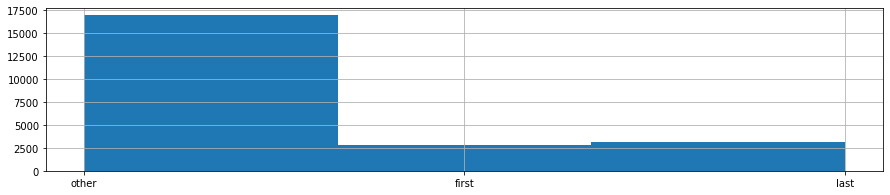

In [73]:
data['floor_type'].hist(bins=3, figsize=(15, 3))
ax.set_xlabel('floor type')
ax.set_ylabel('frequency')
ax.set_title('Floor type')

In [74]:
data.groupby(by='floor_type')['floor_type'].count()

floor_type
first     2786
last      3164
other    16946
Name: floor_type, dtype: int64

В основном квартиры, представленные в выборке, находятся не на первом и не на последнем этаже. Квартиры на первом и последнем этаже составляют примерно по 20% в выборке.

##### Общее количество этажей в доме

Text(0.5, 1.0, 'Floors total')

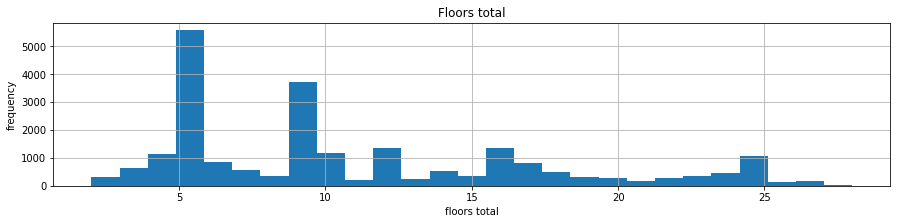

In [75]:
ax = data['floors_total'].hist(bins=27, figsize=(15, 3))
ax.set_xlabel('floors total')
ax.set_ylabel('frequency')
ax.set_title('Floors total')

В выборке представлены дома от 1 до 27 этажей. Основная часть квартир находится в пятиэтажках и девятиэтажках. Пики поменьше приходятся на 12-, 16- и 25-этажки.

##### Расстояние до центра города

Text(0.5, 1.0, 'City center nearest')

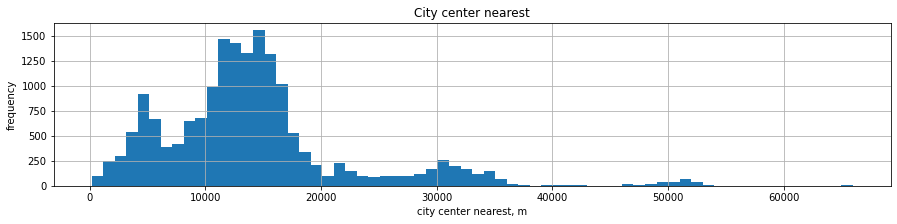

In [76]:
ax = data['cityCenters_nearest'].hist(bins=66, figsize=(15, 3))
ax.set_xlabel('city center nearest, m')
ax.set_ylabel('frequency')
ax.set_title('City center nearest')

In [77]:
data['cityCenters_nearest'].describe()

count    17620.000000
mean     14252.653178
std       8560.618603
min        181.000000
25%       9425.000000
50%      13145.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Расстояние от центра города до квартир в выборке может достигать 66 км. Основная часть квартир находится на расстоянии от 10 до 16 км - это спальные районы и ближайший пригород. Пик поменьше приходится на центр города - от 3 до 6 км. Также есть небольшой пик от 30 до 34 км - это города-сателлиты Петербурга

##### Расстояние до ближайшего аэропорта

Text(0.5, 1.0, 'Airport nearest')

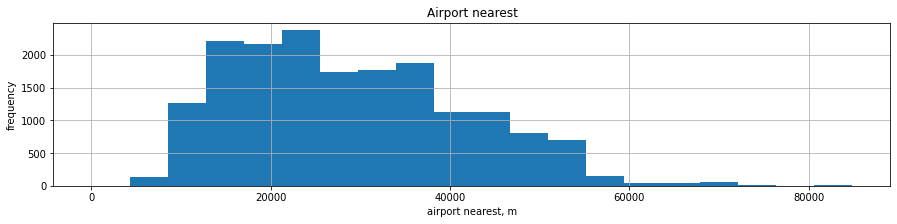

In [78]:
ax = data['airports_nearest'].hist(bins=20, figsize=(15, 3))
ax.set_xlabel('airport nearest, m')
ax.set_ylabel('frequency')
ax.set_title('Airport nearest')

In [79]:
data['airports_nearest'].describe()

count    17600.000000
mean     28823.068125
std      12650.367556
min          0.000000
25%      18497.500000
50%      26817.000000
75%      37347.250000
max      84869.000000
Name: airports_nearest, dtype: float64

Расстояние от квартир, представленных в выборке, до аэропорта варьируется от 7 км до 85 км. Среднее растояние - 29 км. Медианное расстояние - 27 км. Основная часть квартир находится от аэропорта на расстоянии от 18 до 37 км.

##### Расстояние до ближайшего парка

Text(0.5, 1.0, 'Parks nearest')

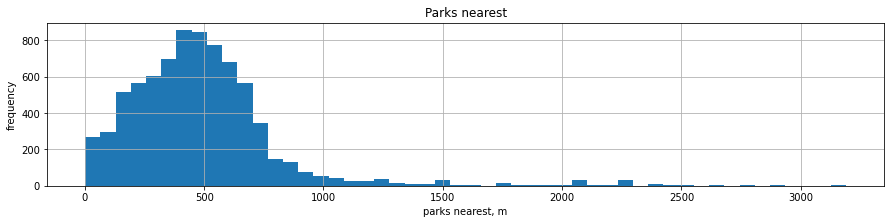

In [80]:
ax = data['parks_nearest'].hist(bins=50, figsize=(15, 3))
ax.set_xlabel('parks nearest, m')
ax.set_ylabel('frequency')
ax.set_title('Parks nearest')

In [81]:
data['parks_nearest'].describe()

count    7770.000000
mean      492.388546
std       341.403263
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Для тех квартир, недалеко от которых есть парк, он находится на расстоянии от 1 до 3190 м. Среднее расстояние до ближайшего парка составляет 492 м. Медианное растояние - 456 м. В основном парк находится на расстоянии от 289 до 613 м.

##### День публикации объявления

Text(0.5, 1.0, 'Day of week')

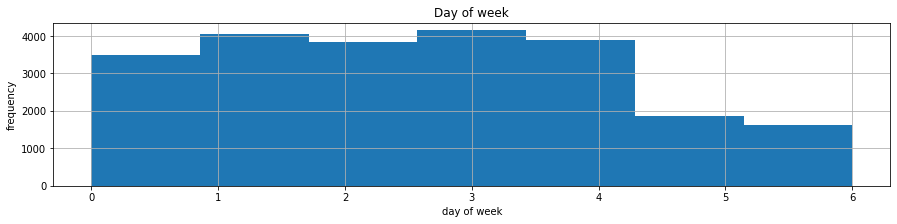

In [82]:
ax = data['weekday'].hist(bins=7, figsize=(15, 3))
ax.set_xlabel('day of week')
ax.set_ylabel('frequency')
ax.set_title('Day of week')

В будние дни публикуют примерно в два раза больше объявлений о продаже квартиры, чем в выходные дни.

##### Месяц публикации объявления

Text(0.5, 1.0, 'Month')

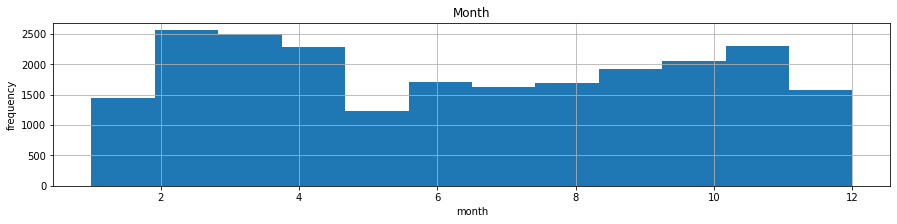

In [83]:
ax = data['month'].hist(bins=12, figsize=(15, 3))
ax.set_xlabel('month')
ax.set_ylabel('frequency')
ax.set_title('Month')

Пик публикаций объявлений о продаже квартир приходится на февраль-апрель. Затем в мае происходит значительный спад. И затем вплоть до ноября идет плавный подъем. Затем в декабре-январе снова происходит спад. 

##### Длительность публикации

Text(0.5, 1.0, 'Days exposition')

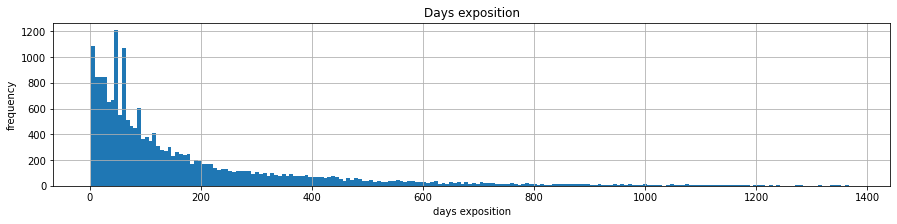

In [84]:
ax = data['days_exposition'].hist(bins=200, figsize=(15, 3))
ax.set_xlabel('days exposition')
ax.set_ylabel('frequency')
ax.set_title('Days exposition')

In [85]:
data['days_exposition'].describe()

count    19842.000000
mean       178.750932
std        214.956713
min          3.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1373.000000
Name: days_exposition, dtype: float64

Объявления о продаже квартир «висели» от 3 до 1373 дней. Среднее значение - 179 дней. Медианное значение - 95 дней. В основном публикация длилась от 45 до 229 дней. Продажи меньше 45 дней можно считать быстрыми, а продажи дольше 229 дней - необычно долгими.

In [86]:
data.pivot_table(index='year', values='days_exposition', aggfunc='mean')

,days_exposition
year,
2014,858.669811
2015,639.012264
2016,320.739114
2017,158.211971
2018,94.260377
2019,30.969495


Text(0.5, 1.0, 'Days exposition by years')

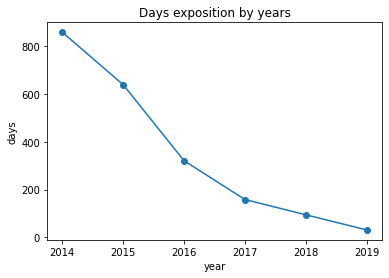

In [87]:
ax = data.groupby(by='year')['days_exposition'].mean().plot(style='o-')
ax.set_xlabel('year')
ax.set_ylabel('days')
ax.set_title('Days exposition by years')

Кажется, что среднее время продажи уменьшается с каждым годом, но в статистике нет более 3 000 квартир, которые еще не проданы, и их время продажи еще неизвестно

<AxesSubplot:>

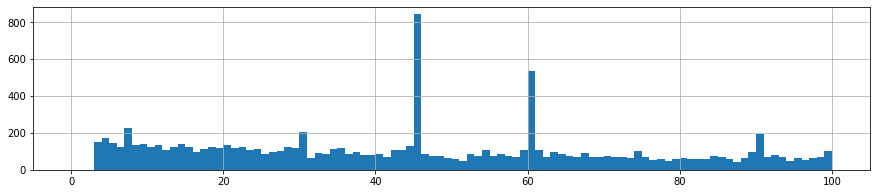

In [88]:
data['days_exposition'].hist(bins=100, figsize=(15, 3), range=(0, 100))

Наиболее часто встречающиеся показатели - 45, 60 и 90 дней. Это связано с правилами сроков публикации сервиса

#### Какие факторы больше всего влияют на общую стоимость объекта?

##### Общая площадь

In [90]:
price_by_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()
price_by_total_area

,total_area,last_price
0,20.00,2300000.0
1,20.10,2150000.0
2,20.50,2085000.0
3,20.67,1855625.0
4,20.80,1900000.0
...,...,...
2003,284.00,26450000.0
2004,290.00,39625000.0
2005,293.60,39000000.0
2006,295.00,35000000.0


In [91]:
price_by_total_area['total_area'].corr(price_by_total_area['last_price'])

0.8534465724463516

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

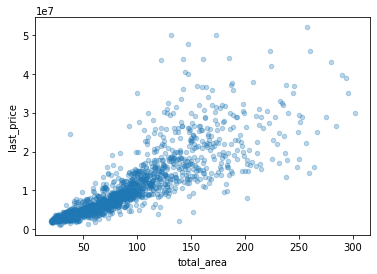

In [92]:
price_by_total_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

Корреляция между общей площадью и ценой квартиры очень высока: чем больше площадь, тем выше цена. На каждые 100 кв.м площади цена увеличивается на 10 млн.

Коэффициент Пирсона для этих двух величин составляет 0,93.

##### Жилая площадь

In [93]:
price_by_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()
price_by_living_area

,living_area,last_price
0,10.90,2750000.0
1,10.93,1900000.0
2,10.94,1550000.0
3,11.00,3277000.0
4,11.10,3590000.0
...,...,...
1642,171.00,17000000.0
1643,174.00,52000000.0
1644,174.30,37000000.0
1645,175.00,45900000.0


In [94]:
price_by_living_area['living_area'].corr(price_by_living_area['last_price'])

0.7886299984659861

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

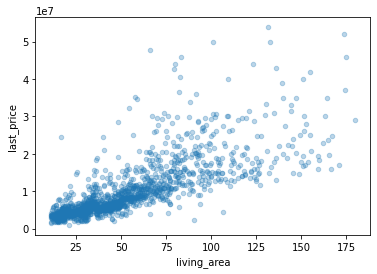

In [95]:
price_by_living_area.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)

Корреляция между жилой площадью и ценой квартиры немного меньше, но все еще довольно высока: чем больше площадь, тем выше цена. Коэффициент Пирсона для этих двух величин составляет 0,89.

##### Площадь кухни

In [96]:
price_by_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()
price_by_kitchen_area

,kitchen_area,last_price
0,5.00,3200000.0
1,5.04,3900000.0
2,5.06,3400000.0
3,5.10,3625000.0
4,5.14,1800000.0
...,...,...
880,44.00,23200000.0
881,44.70,17150000.0
882,44.90,17480000.0
883,45.00,22000000.0


In [97]:
price_by_kitchen_area['kitchen_area'].corr(price_by_kitchen_area['last_price'])

0.6669006802961823

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

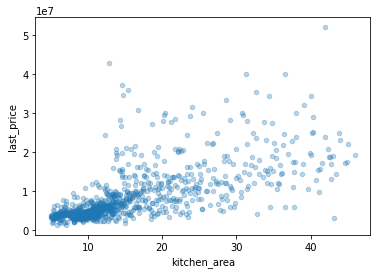

In [98]:
price_by_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)

Связь между площадью кухни и ценой более расплывчата по сравнению с предыдущими величинами, но все еще наблюдается: чем больше площадь, тем выше цена. Коэффициент Пирсона для этих двух величин составляет 0,79.

##### Количество комнат

In [99]:
price_by_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
price_by_rooms

,rooms,last_price
0,0,2750000.0
1,1,3600000.0
2,2,4800000.0
3,3,6190000.0
4,4,8900000.0
5,5,12900000.0
6,6,16550000.0
7,7,18000000.0


In [100]:
price_by_rooms['rooms'].corr(price_by_rooms['last_price'])

0.9752366249207627

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

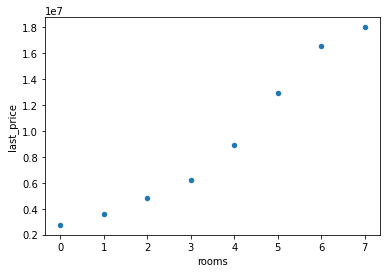

In [101]:
price_by_rooms.plot(x='rooms', y='last_price', kind='scatter')

Тенденция увеличения цены с увеличением количества комнат в квартире прослеживается, но не так ярко, как в первых двух пунктах. Коэффициент Пирсона здесь равен 0,79.

##### Тип этажа, на котором расположена квартира

In [102]:
price_by_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
price_by_floor_type

,floor_type,last_price
0,first,3950000.0
1,last,4350000.0
2,other,4800000.0


<AxesSubplot:xlabel='floor_type'>

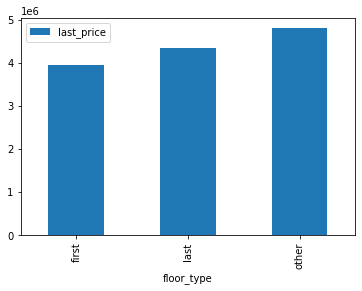

In [103]:
price_by_floor_type.plot(x='floor_type', y='last_price', kind='bar')

Между типом этажа и ценой квартиры прослеживается такая зависимость: на первом этаже квартиры самые дешевые - в среднем 4 млн, средняя цена на квартиры на последнем этаже - 4,4 млн, и остальные квартиры более дорогие - 4,8 млн.

##### Дата размещения - день недели

In [104]:
price_by_weekday = data.pivot_table(index='weekday', values='last_price', aggfunc='median').reset_index()
price_by_weekday

,weekday,last_price
0,0,4650000.0
1,1,4714595.0
2,2,4700000.0
3,3,4630000.0
4,4,4577500.0
5,5,4560000.0
6,6,4550000.0


<AxesSubplot:xlabel='weekday'>

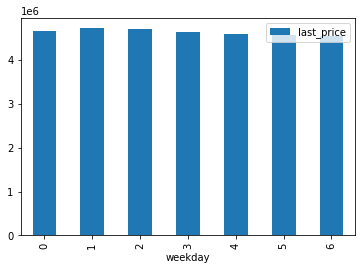

In [105]:
price_by_weekday.plot(x='weekday', y='last_price', kind='bar')

Чем ближе к концу недели выставлена на продажу квартира, тем ниже ее цена. Самая высокая - во вторник - 4,8 млн, самая низкая - 4,5 млн в субботу. Впрочем, колебания достаточно незначительны.

##### Дата размещения - месяц

In [106]:
price_by_month = data.pivot_table(index='month', values='last_price', aggfunc='median').reset_index()
price_by_month

,month,last_price
0,1,4600000.0
1,2,4650000.0
2,3,4650000.0
3,4,4800000.0
4,5,4500000.0
5,6,4400000.0
6,7,4650000.0
7,8,4600000.0
8,9,4700000.0
9,10,4590000.0


<AxesSubplot:xlabel='month'>

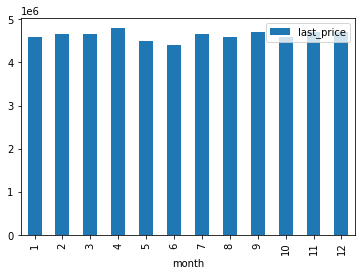

In [107]:
price_by_month.plot(x='month', y='last_price', kind='bar')

За самую низкую цену продаются квартиры, выставленные на продажу в июне, октябре и марте (4,5 млн, 4,6 млн и 4,6 млн соответственно). Самую высокую цену имеют квартиры, выставленные на продажу в феврале и апреле (по 4,8 млн).

##### Дата размещения - год

In [108]:
price_by_year = data.pivot_table(index='year', values='last_price', aggfunc='median').reset_index()
price_by_year

,year,last_price
0,2014,7488280.0
1,2015,5244500.0
2,2016,4550000.0
3,2017,4500000.0
4,2018,4600000.0
5,2019,5100000.0


In [109]:
price_by_year['year'].corr(price_by_year['last_price'])

-0.6524391923100387

<AxesSubplot:xlabel='year'>

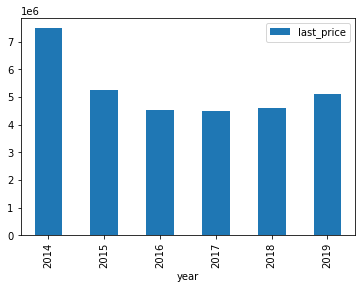

In [110]:
price_by_year.plot(x='year', y='last_price', kind='bar')

Цена на недвижимость падала с 7,5 млн в 2014 году до 4,5 млн в 2017 году, затем росла до 5,1 млн в 2019 году.

In [111]:
area_by_year = data.pivot_table(index='year', values='total_area', aggfunc='median').reset_index()
area_by_year

,year,total_area
0,2014,75.265
1,2015,60.000
2,2016,53.010
3,2017,51.800
4,2018,50.800
5,2019,52.000


<AxesSubplot:xlabel='year'>

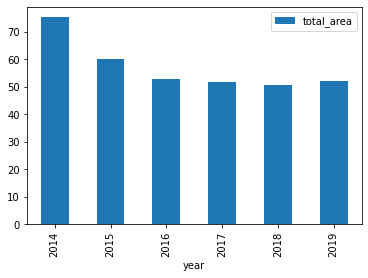

In [112]:
area_by_year.plot(x='year', y='total_area', kind='bar')

Если посмотреть на эти два графика, то можно заметить, что они похожи, и предположить, что это не год влиял на цену недвижимости, а площадь.

In [113]:
count_by_year = data.pivot_table(index='year', values='total_area', aggfunc='count').reset_index()
count_by_year = count_by_year.rename(columns={'total_area': 'number_of_objects'})
count_by_year

,year,number_of_objects
0,2014,124
1,2015,1128
2,2016,2680
3,2017,7940
4,2018,8246
5,2019,2778


<AxesSubplot:xlabel='year'>

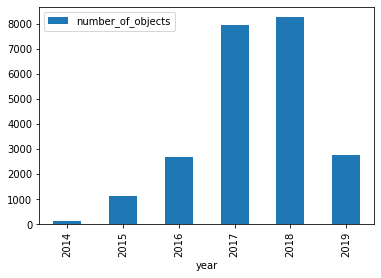

In [114]:
count_by_year.plot(x='year', y='number_of_objects', kind='bar')

Количество объявлений растет с каждым годом, за последний год, видимо, представлена только часть данных. Чем меньше данных, тем более подвержена выборка выбросам, из-за этого могут быть такие показатели.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах  с наибольшим числом объявлений

In [115]:
top_10_localities = data.groupby(by='locality_name')['locality_name'] \
                        .count().sort_values(ascending=False).head(10).index.to_list()
top_10_localities

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [116]:
top_10_localities_data = data.query('locality_name in @top_10_localities')
top_10_localities_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,other,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,other,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,other,8.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110545.0,3,4,2019,other,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100567.0,2,2,2018,other,16.0
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.0,3,7,2018,other,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129904.0,3,10,2016,other,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72491.0,1,3,2017,other,4.0


In [117]:
top_10_pivot_table = top_10_localities_data.pivot_table(index='locality_name', values='sq_m_price', aggfunc='mean') \
                      .sort_values(by='sq_m_price', ascending=True) 
                      
top_10_pivot_table.style.format('{:,.2f}')

,sq_m_price
locality_name,
Выборг,"58,510.33"
Всеволожск,"68,735.61"
Гатчина,"68,858.45"
Колпино,"75,352.47"
поселок Шушары,"78,516.75"
поселок Мурино,"85,327.28"
поселок Парголово,"90,089.64"
деревня Кудрово,"92,463.94"
Пушкин,"102,987.68"


<AxesSubplot:ylabel='locality_name'>

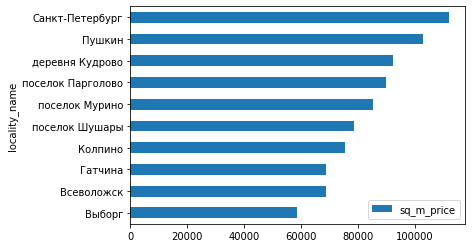

In [118]:
top_10_pivot_table.plot(kind='barh')

Самая высокая цена квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.

#### Посчитайте цену квадратного метра в Санкт-Петербурге за каждый километр от центра

In [119]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,other,16.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,other,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,other,8.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110545.0,3,4,2019,other,12.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88525.0,6,2,2017,other,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100567.0,2,2,2018,other,16.0
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.0,3,7,2018,other,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129904.0,3,10,2016,other,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72491.0,1,3,2017,other,4.0


In [120]:
sq_m_price_by_km = spb_data.pivot_table(index=['cityCenters_nearest_km'], values='sq_m_price', aggfunc='mean').reset_index()
sq_m_price_by_km

,cityCenters_nearest_km,sq_m_price
0,0.0,197284.000000
1,1.0,145777.423529
2,2.0,137942.380435
3,3.0,118375.541667
4,4.0,127082.873303
5,5.0,134339.834112
6,6.0,141098.865749
7,7.0,142433.547558
8,8.0,123868.908146
9,9.0,113299.153713


In [121]:
sq_m_price_by_km['cityCenters_nearest_km'].corr(sq_m_price_by_km['sq_m_price'])

-0.7975515026055234

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='sq_m_price'>

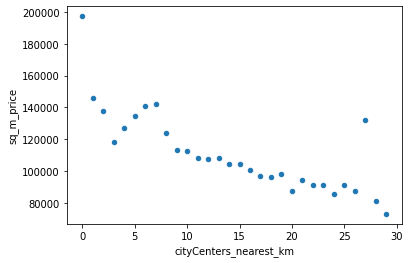

In [122]:
sq_m_price_by_km.plot(x='cityCenters_nearest_km', y='sq_m_price', kind='scatter')

В пределах первых 10 км от центра цена за кв метр не зависит от удаленности от центра и варьируется в пределах 106-113 тыс за кв.м, после 10 км цена падает до 68 тыс на 28-ом километре. Коэффициент Пирсона между этими двумя величинами равен -0,9.

In [137]:
price_by_km = spb_data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').reset_index()
price_by_km

,cityCenters_nearest_km,last_price
0,0.0,1.932872e+07
1,1.0,1.268029e+07
2,2.0,1.212069e+07
3,3.0,1.017236e+07
4,4.0,1.104635e+07
5,5.0,1.148556e+07
6,6.0,1.193105e+07
7,7.0,1.148634e+07
8,8.0,9.020725e+06
9,9.0,6.981640e+06


In [124]:
price_by_km['cityCenters_nearest_km'].corr(price_by_km['last_price'])

-0.804059393319589

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='last_price'>

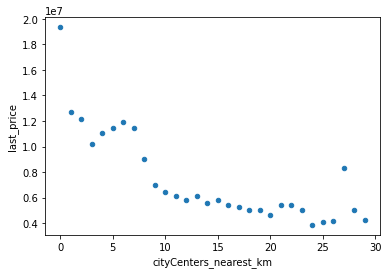

In [125]:
price_by_km.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter')

In [126]:
data.query('cityCenters_nearest_km == 27').sort_values(by='last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,cityCenters_nearest_km
2414,20,29500000.0,115.00,2017-07-21,3,3.00,2,69.75,2,False,False,False,19.2,4,Пушкин,14456.0,26609.0,3.0,229.0,3.0,172.0,328.0,256522.0,4,7,2017,last,27.0
4978,8,29000000.0,228.00,2016-12-29,4,3.50,3,141.00,2,False,False,False,40.4,1,Пушкин,14651.0,26805.0,3.0,421.0,3.0,237.0,572.0,127193.0,3,12,2016,other,27.0
18386,15,24800000.0,190.00,2014-12-10,4,2.62,4,104.10,3,False,False,False,30.0,0,Пушкин,15072.0,27226.0,1.0,114.0,0.0,NaN,NaN,130526.0,2,12,2014,other,27.0
140,8,16912000.0,105.70,2016-12-09,2,2.70,3,48.40,1,False,False,False,15.4,0,Пушкин,14352.0,26506.0,3.0,366.0,3.0,179.0,390.0,160000.0,4,12,2016,first,27.0
7996,17,16600000.0,106.00,2017-12-02,4,3.20,3,50.00,3,False,False,False,30.0,0,Пушкин,14822.0,26976.0,1.0,254.0,0.0,NaN,NaN,156604.0,5,12,2017,last,27.0
15578,20,16000000.0,101.90,2018-01-08,2,2.87,4,48.10,1,False,False,False,26.9,0,Пушкин,15201.0,27355.0,2.0,273.0,3.0,368.0,NaN,157017.0,0,1,2018,first,27.0
12466,11,15000000.0,89.60,2017-01-31,3,NaN,3,57.00,3,False,False,False,13.5,0,Пушкин,15065.0,27218.0,3.0,317.0,3.0,509.0,357.0,167411.0,1,1,2017,last,27.0
748,13,14350000.0,74.00,2017-11-28,2,3.13,5,30.00,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,193919.0,1,11,2017,other,27.0
4400,4,12300000.0,78.65,2017-09-09,3,NaN,5,48.00,1,False,False,False,11.0,0,Пушкин,14567.0,26720.0,2.0,403.0,0.0,NaN,4.0,156389.0,5,9,2017,first,27.0
2948,23,11350000.0,75.00,2017-08-15,3,3.50,2,52.70,2,False,False,False,8.7,4,Пушкин,15337.0,27490.0,3.0,216.0,3.0,153.0,207.0,151333.0,1,8,2017,last,27.0


В 27 км от центра СПб находится город Пушкин - самый дорогой из городов-сателлитов, поэтому имеет место такой выброс.

In [127]:
data.query('cityCenters_nearest_km == 3').groupby(by='floor_type')['floor_type'].count()

floor_type
first     54
last      77
other    207
Name: floor_type, dtype: int64

На третьем километре велика доля дешевых квартир на первом и последнем этажах - 63%, поэтому на графике видно провал.

In [128]:
data.query('cityCenters_nearest_km == 5').groupby(by='floor_type')['floor_type'].count()

floor_type
first     78
last     132
other    650
Name: floor_type, dtype: int64

На пятом километре наоборот доля таких квартир низкая - 32%, поэтому наблюдаем пик.

<AxesSubplot:xlabel='floor_type'>

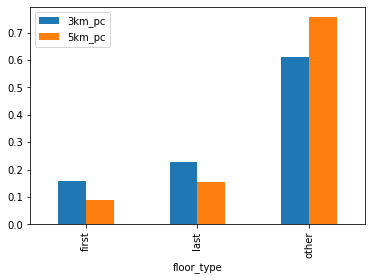

In [129]:
floors = pd.DataFrame(
    [
        data.query('cityCenters_nearest_km == 3').groupby('floor_type')['floor_type'].count().rename('3km'),
        data.query('cityCenters_nearest_km == 5').groupby('floor_type')['floor_type'].count().rename('5km')
    ]
).T.reset_index()
floors['3km_pc'] = floors['3km'].apply(lambda x: x/floors['3km'].sum())
floors['5km_pc'] = floors['5km'].apply(lambda x: x/floors['5km'].sum())
floors[['floor_type', '3km_pc', '5km_pc']].plot(x='floor_type', kind='bar')

### Общий вывод

На ценообразование недвижимости влияют многие факторы.

В первую очередь играет роль близость объекта к центру города: самый высокий показатель цены за квадратный метр имеют объекты, находящиеся в 10 км от центра - от 112 до 197 тыс за кв.м. В некоторых пригородных населенных пунктах цена за кв.м сравнима с ценой за кв.м в Санкт-Петербурге, например, Пушкин c ценой за кв.м. 103 тыс.

Также большую роль играет общая и жилая площадь недвижимости. За каждый 1 кв.м площади цена увеличивается примерно на 100 тыс.

Площадь кухни и количество комнат влияют на цену недвижимости немного менее значительно. Здесь проследить взаимосвязь сложнее, так как данные более разрознены, но за каждый 1 кв.м кухни цена увеличивается в среднем на 500 тыс, а за каждую комнату на 250 тыс.

Также цена зависит от типа этажа: квартиры дешевле на первом этаже (4 млн в среднем) и на последнем (4,4 млн в среднем), чем на остальных этажах (4,8 млн в среднем).

Также цена зависит от даты публикации. Чем ближе к концу недели выставлена на продажу квартира, тем ниже ее цена. Самая высокая - во вторник - 4,8 млн, самая низкая - 4,5 млн в субботу. Впрочем, колебания достаточно незначительны.

По месяцам ситуация такая: за самую низкую цену продаются квартиры, выставленные на продажу в июне и мае (4,4 млн и 4,5 млн соответственно). Самую высокую цену имеют квартиры, выставленные на продажу в апреле (по 4,8 млн). Однако, здесь, так же как и с днями недели, колебания незначительны.

Цена на недвижимость падала с 7,5 млн в 2014 году до 4,5 млн в 2017 году, затем росла до 5,1 млн в 2019 году, но сравнив по годам такие факторы, как площадь помещения и количество объявлений, можно сделать вывод, что от этих величин стоимость зависит больше, нежели от года продажи.